## Análisis Exploratorio de Datos - Fish.csv

### Carga del dataset y revisión inicial

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [63]:
# Cargar el dataset
df = pd.read_csv('Fish.csv')

# Primeras filas
print("="*60)
print("PRIMERAS 5 FILAS DEL DATASET")
print("="*60)
print(df.head())

print("\n" + "="*60)
print("DIMENSIONES DEL DATASET")
print("="*60)
print(f"Filas: {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")


PRIMERAS 5 FILAS DEL DATASET
  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340

DIMENSIONES DEL DATASET
Filas: 159
Columnas: 7


In [64]:
print("\n" + "="*60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*60)
print(df.info())


INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None


In [65]:
print("\n" + "="*60)
print("PRIMER ANALISIS CON LA INFORMACION BASICA")
print("="*60)
print("El dataset contiene 159 registros y 7 columnas.")
print("Podemos observar 7 variables: 1 categorica (Species) y 6 numerícas")
print("Descripción de las variables:")
print("\n"+"="*60)

print("Descripción de las características")
print("Species - Nombre de la especie del pez")
print("Weight - Peso del pez en gramos")
print("Length1 - Longitud vertical en cm")
print("Length2 - Longitud diagonal en cm")
print("Length3 - Longitud transversal en cm")
print("Height - Altura en cm")
print("Width - Ancho en cm")

print("\n"+"="*60)
print("De primera instancia no se observan valores nulos en el dataset.")
print("Y los tipos de datos parecen correctos para cada variable.")



PRIMER ANALISIS CON LA INFORMACION BASICA
El dataset contiene 159 registros y 7 columnas.
Podemos observar 7 variables: 1 categorica (Species) y 6 numerícas
Descripción de las variables:

Descripción de las características
Species - Nombre de la especie del pez
Weight - Peso del pez en gramos
Length1 - Longitud vertical en cm
Length2 - Longitud diagonal en cm
Length3 - Longitud transversal en cm
Height - Altura en cm
Width - Ancho en cm

De primera instancia no se observan valores nulos en el dataset.
Y los tipos de datos parecen correctos para cada variable.


### Detección de valores nulos, duplicados y validación de tipos

In [66]:
print("="*60)
print("VALORES NULOS POR COLUMNA")
print("="*60)
print(df.isnull().sum())
print(f"\nTotal de valores nulos: {df.isnull().sum().sum()}")




VALORES NULOS POR COLUMNA
Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Total de valores nulos: 0


In [67]:
print("\n" + "="*60)
print("PORCENTAJE DE VALORES NULOS")
print("="*60)
print(round(df.isnull().sum() / len(df) * 100, 2))




PORCENTAJE DE VALORES NULOS
Species    0.0
Weight     0.0
Length1    0.0
Length2    0.0
Length3    0.0
Height     0.0
Width      0.0
dtype: float64


In [68]:
print("\n" + "="*60)
print("FILAS DUPLICADAS")
print("="*60)
duplicados = df.duplicated().sum()
print(f"Total de filas duplicadas: {duplicados}")

if duplicados > 0:
    print("\nFilas duplicadas:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))

print("\n" + "="*60)
print("TIPOS DE DATOS")
print("="*60)
print(df.dtypes)

print("\n" + "="*60)
print("VALORES ÚNICOS POR COLUMNA")
print("="*60)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")


FILAS DUPLICADAS
Total de filas duplicadas: 0

TIPOS DE DATOS
Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

VALORES ÚNICOS POR COLUMNA
Species: 7 valores únicos
Weight: 101 valores únicos
Length1: 116 valores únicos
Length2: 93 valores únicos
Length3: 124 valores únicos
Height: 154 valores únicos
Width: 152 valores únicos


In [69]:
print("\n"+"="*60)
print("ANALISIS DE LA DETECCION DE VALORES NULOS Y DUPLICADOS")
print("\n"+"="*60)
print("Podemos concluir que no existen valores nulos ni filas duplicadas en nuestro dataset.")
print("Por lo que no es necesaria ninguna acción de limpieza ni imputacion")
print("Los tipos de datos son correctos y no requieren transformaciones")
print("Tenemos una gran variedad de valores unicos por columna, lo que sera favorable para nuestro analisis")
print("\n"+"="*60)
print("Contamos con 7 especies diferentes de tipo categoricas y una gran variedad de valores unicos para las columnas numericas.")


ANALISIS DE LA DETECCION DE VALORES NULOS Y DUPLICADOS

Podemos concluir que no existen valores nulos ni filas duplicadas en nuestro dataset.
Por lo que no es necesaria ninguna acción de limpieza ni imputacion
Los tipos de datos son correctos y no requieren transformaciones
Tenemos una gran variedad de valores unicos por columna, lo que sera favorable para nuestro analisis

Contamos con 7 especies diferentes de tipo categoricas y una gran variedad de valores unicos para las columnas numericas.


### Análisis univariado - Variable Species

In [70]:
print("="*60)
print("DISTRIBUCIÓN DE ESPECIES")
print("="*60)
especies_count = df['Species'].value_counts()
print(especies_count)

print("\n" + "="*60)
print("PORCENTAJE POR ESPECIE")
print("="*60)
especies_pct = df['Species'].value_counts(normalize=True) * 100
print(round(especies_pct, 2))



DISTRIBUCIÓN DE ESPECIES
Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

PORCENTAJE POR ESPECIE
Species
Perch        35.22
Bream        22.01
Roach        12.58
Pike         10.69
Smelt         8.81
Parkki        6.92
Whitefish     3.77
Name: proportion, dtype: float64


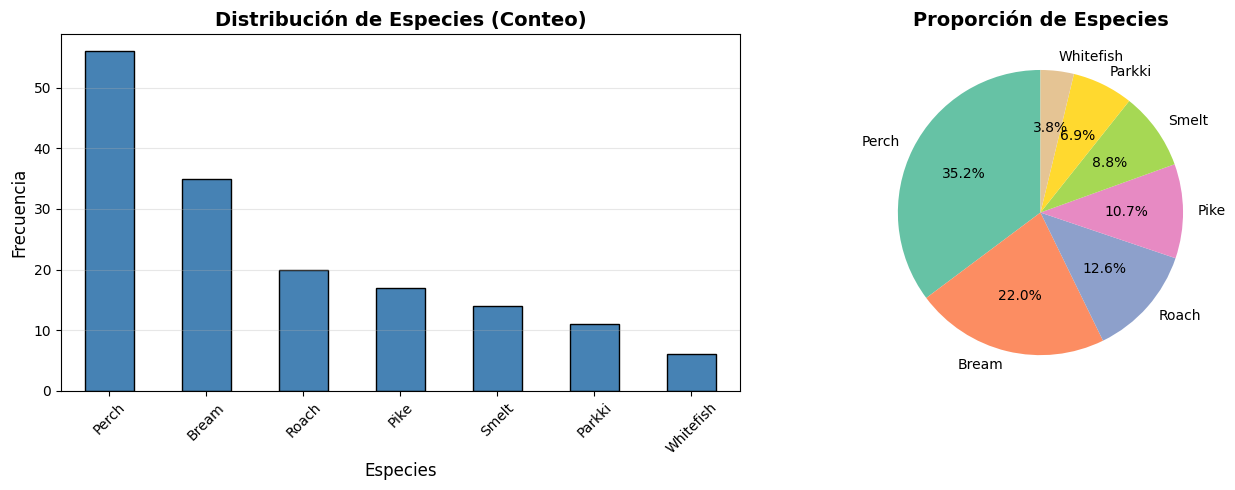

In [71]:
# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
especies_count.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Distribución de Especies (Conteo)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Especies', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Gráfico de pastel
axes[1].pie(especies_count, labels=especies_count.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette('Set2', len(especies_count)))
axes[1].set_title('Proporción de Especies', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [72]:
print("\n"+"="*60)
print("INTERPRETACION DE LA DISTRIBUCION DE ESPECIES")
print("\n"+"="*60)
print("Podemos observar que nuestro dataset esta desvalanceado en cuanto a la distribución de especies" \
"\nsiendo la especie perch la que domina con mas del 35% de los registros" \
"\nespecies como Whitefich y Parkki tienen porcentajes menores al 10%" \
"\nesto no afectara nuestro modelo de regresion pero " \
"\nsi queremos predecir peso, debemos verificar que las relaciones entre " \
"\nvariables sean similares entre especies, o considerar modelos separados por especie.")



INTERPRETACION DE LA DISTRIBUCION DE ESPECIES

Podemos observar que nuestro dataset esta desvalanceado en cuanto a la distribución de especies
siendo la especie perch la que domina con mas del 35% de los registros
especies como Whitefich y Parkki tienen porcentajes menores al 10%
esto no afectara nuestro modelo de regresion pero 
si queremos predecir peso, debemos verificar que las relaciones entre 
variables sean similares entre especies, o considerar modelos separados por especie.


### Análisis univariado - Variables numéricas

In [73]:
print("="*60)
print("ESTADÍSTICOS DESCRIPTIVOS DE VARIABLES NUMÉRICAS")
print("="*60)
desc = df.describe().T
desc['rango'] = desc['max'] - desc['min']
desc['cv'] = (desc['std'] / desc['mean']) * 100  # Coeficiente de variación
print(desc.round(2))

print("\n" + "="*60)
print("ASIMETRÍA (SKEWNESS) Y CURTOSIS")
print("="*60)
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    skew = df[col].skew()
    kurt = df[col].kurt()
    print(f"{col:12} | Skewness: {skew:6.2f} | Kurtosis: {kurt:6.2f}")




ESTADÍSTICOS DESCRIPTIVOS DE VARIABLES NUMÉRICAS
         count    mean     std   min     25%     50%     75%      max  \
Weight   159.0  398.33  357.98  0.00  120.00  273.00  650.00  1650.00   
Length1  159.0   26.25   10.00  7.50   19.05   25.20   32.70    59.00   
Length2  159.0   28.42   10.72  8.40   21.00   27.30   35.50    63.40   
Length3  159.0   31.23   11.61  8.80   23.15   29.40   39.65    68.00   
Height   159.0    8.97    4.29  1.73    5.94    7.79   12.37    18.96   
Width    159.0    4.42    1.69  1.05    3.39    4.25    5.58     8.14   

           rango     cv  
Weight   1650.00  89.87  
Length1    51.50  38.09  
Length2    55.00  37.71  
Length3    59.20  37.18  
Height     17.23  47.78  
Width       7.09  38.16  

ASIMETRÍA (SKEWNESS) Y CURTOSIS
Weight       | Skewness:   1.10 | Kurtosis:   0.88
Length1      | Skewness:   0.59 | Kurtosis:   0.44
Length2      | Skewness:   0.54 | Kurtosis:   0.40
Length3      | Skewness:   0.39 | Kurtosis:   0.08
Height       | Skewn

Weight tiene un coeficiente de variacion de 89%, lo que indica una alta variabilidad, las longitudes tienen una variabilidad moderada, así mismo en la variable weight tenemos asimetria positiva, lo que indica una cola larga hacia la derecha, como es >1 nos suguiere una transformación para mejorar su normalidad.
Tambien encontramos un valor minimo de 0 en weight, lo cual suguiere un error de medicion o de registro.


### Análisis univariado Histogramas y Boxplots

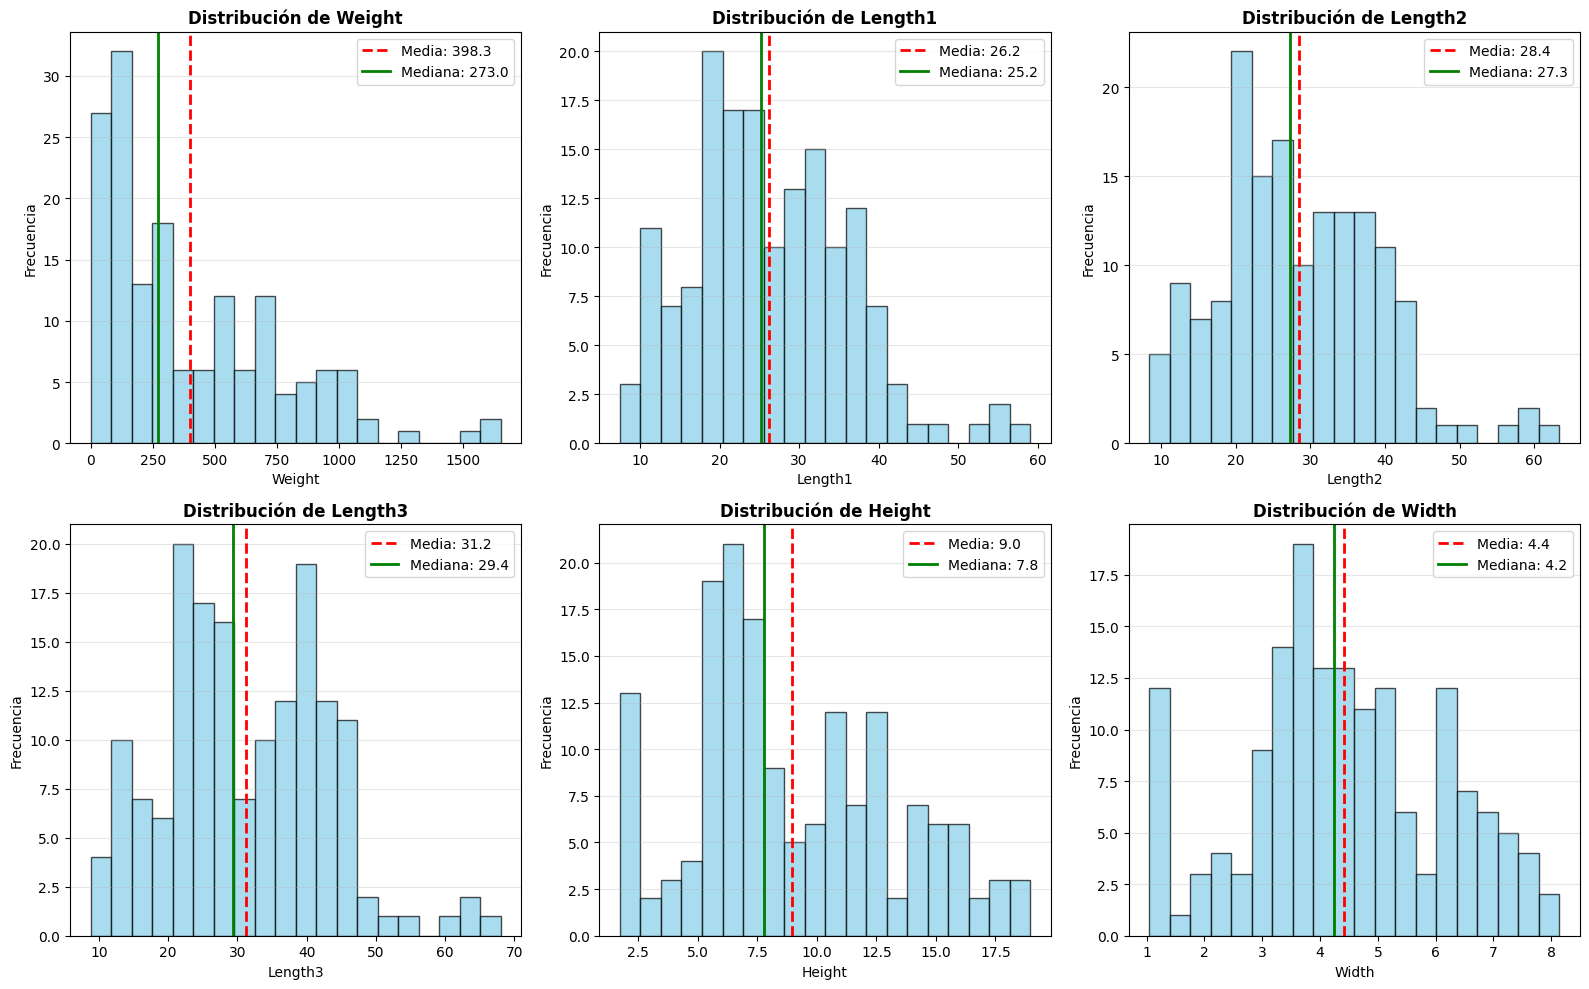

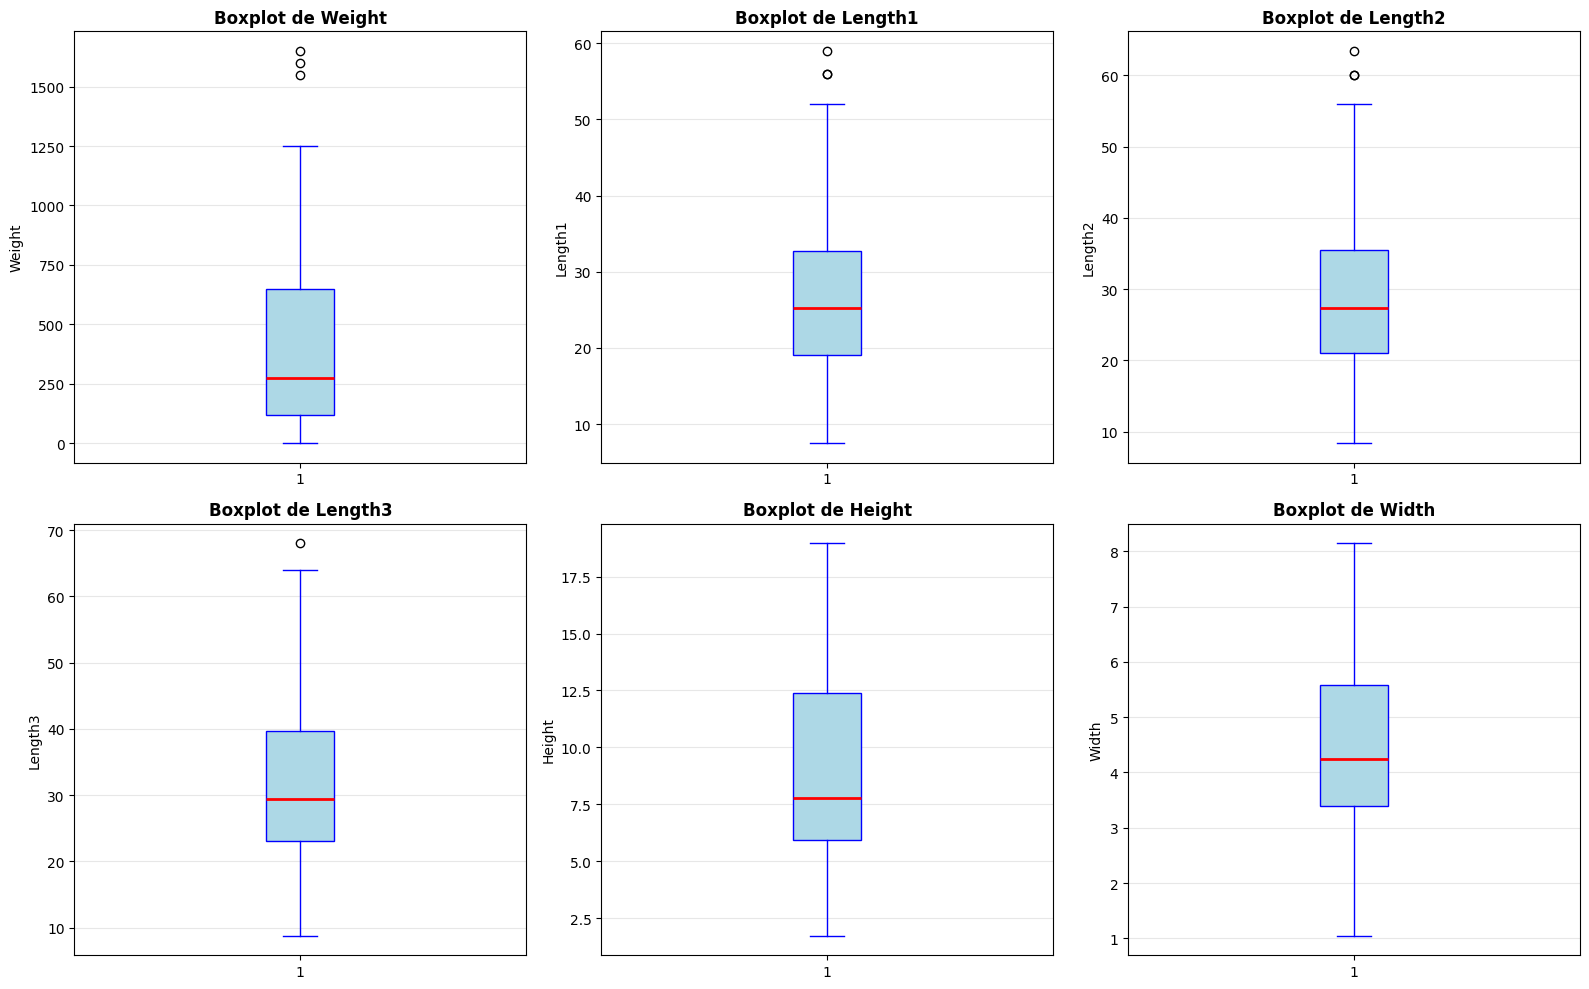

In [74]:
# Histogramas
numeric_cols = df.select_dtypes(include=[np.number]).columns
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df[col].mean():.1f}')
    axes[i].axvline(df[col].median(), color='green', linestyle='-', linewidth=2, label=f'Mediana: {df[col].median():.1f}')
    axes[i].set_title(f'Distribución de {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frecuencia', fontsize=10)
    axes[i].legend()
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Boxplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='blue'),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='blue'),
                    capprops=dict(color='blue'))
    axes[i].set_title(f'Boxplot de {col}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel(col, fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Viendo nuestros histogramas podemos observar que Weight tiene tiene cola larga hacia la derecha, y la media > mediana lo que es señal de asimetria, podemos observar tambien que las longitudes son mas simetricas. Podemos visualizar tambien varios outliers en Weight, tmabien en lenth 1, length 2, length 3, las variables de height y width se observan con menos outliers.

Conclui en que el histograma de weight confirma una distribucion sesgada hacia la derecha. Los boxplots revelan valores exremos en todas las variables, podriamos decir que es normal pues existen peces de muchos tamaños, el valor en weight de 0 es un outlier que sera problematico

In [75]:
print("="*60)
print("VALORES MÍNIMOS (POSIBLES OUTLIERS)")
print("="*60)
print(df[df['Weight'] == 0])

VALORES MÍNIMOS (POSIBLES OUTLIERS)
   Species  Weight  Length1  Length2  Length3  Height   Width
40   Roach     0.0     19.0     20.5     22.8  6.4752  3.3516


### Identificación de outliers


In [76]:
print("="*60)
print("DETECCIÓN DE OUTLIERS - MÉTODO IQR")
print("="*60)

def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
    
    print(f"\n{columna}:")
    print(f"  Q1: {Q1:.2f} | Q3: {Q3:.2f} | IQR: {IQR:.2f}")
    print(f"  Límites: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers detectados: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    
    if len(outliers) > 0:
        print(f"  Valores outliers: min={outliers[columna].min():.2f}, max={outliers[columna].max():.2f}")
    
    return outliers

numeric_cols = df.select_dtypes(include=[np.number]).columns
outliers_dict = {}




DETECCIÓN DE OUTLIERS - MÉTODO IQR


In [77]:
for col in numeric_cols:
    outliers_dict[col] = detectar_outliers_iqr(df, col)


Weight:
  Q1: 120.00 | Q3: 650.00 | IQR: 530.00
  Límites: [-675.00, 1445.00]
  Outliers detectados: 3 (1.9%)
  Valores outliers: min=1550.00, max=1650.00

Length1:
  Q1: 19.05 | Q3: 32.70 | IQR: 13.65
  Límites: [-1.43, 53.18]
  Outliers detectados: 3 (1.9%)
  Valores outliers: min=56.00, max=59.00

Length2:
  Q1: 21.00 | Q3: 35.50 | IQR: 14.50
  Límites: [-0.75, 57.25]
  Outliers detectados: 3 (1.9%)
  Valores outliers: min=60.00, max=63.40

Length3:
  Q1: 23.15 | Q3: 39.65 | IQR: 16.50
  Límites: [-1.60, 64.40]
  Outliers detectados: 1 (0.6%)
  Valores outliers: min=68.00, max=68.00

Height:
  Q1: 5.94 | Q3: 12.37 | IQR: 6.42
  Límites: [-3.69, 22.00]
  Outliers detectados: 0 (0.0%)

Width:
  Q1: 3.39 | Q3: 5.58 | IQR: 2.20
  Límites: [0.09, 8.88]
  Outliers detectados: 0 (0.0%)


In [78]:
print("\n" + "="*60)
print("VALORES <=0)")
print("="*60)
for col in numeric_cols:
    malos = df[df[col] <= 0]
    if len(malos) > 0:
        print(f"{col}: {len(malos)} valores ≤ 0")
        print(malos[[col, 'Species']])


VALORES <=0)
Weight: 1 valores ≤ 0
    Weight Species
40     0.0   Roach


### Análisis multivariado

MATRIZ DE CORRELACIÓN (PEARSON)
         Weight  Length1  Length2  Length3  Height  Width
Weight    1.000    0.916    0.919    0.923   0.724  0.887
Length1   0.916    1.000    1.000    0.992   0.625  0.867
Length2   0.919    1.000    1.000    0.994   0.640  0.874
Length3   0.923    0.992    0.994    1.000   0.703  0.879
Height    0.724    0.625    0.640    0.703   1.000  0.793
Width     0.887    0.867    0.874    0.879   0.793  1.000

CORRELACIONES CON WEIGHT (ORDENADAS)
Weight     1.000000
Length3    0.923044
Length2    0.918618
Length1    0.915712
Width      0.886507
Height     0.724345
Name: Weight, dtype: float64


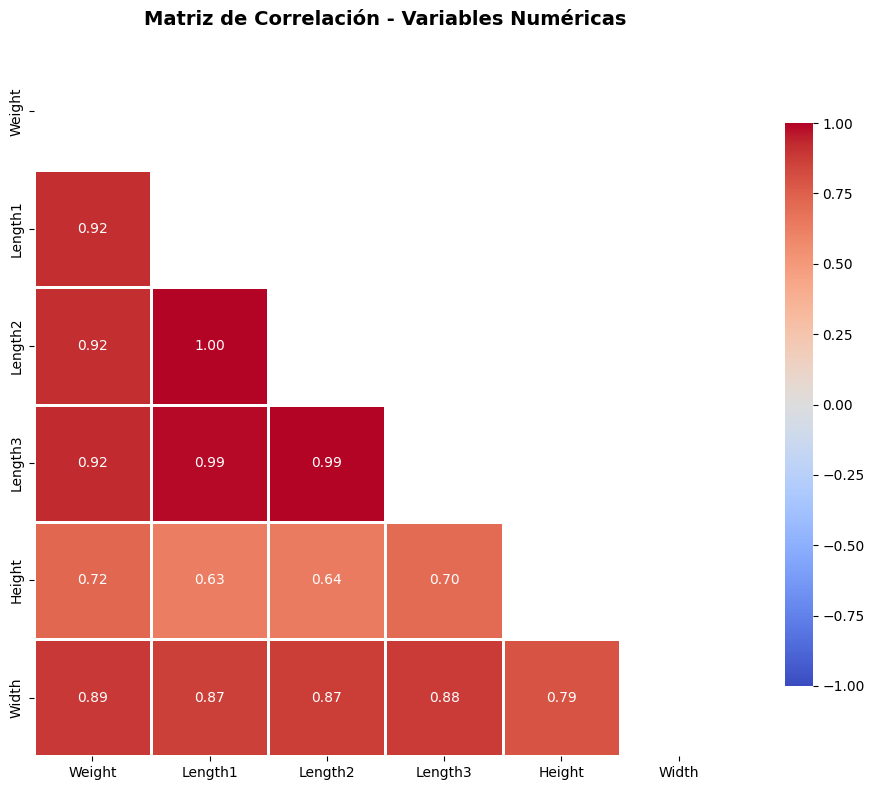

In [79]:
print("="*60)
print("MATRIZ DE CORRELACIÓN (PEARSON)")
print("="*60)
corr_matrix = df[numeric_cols].corr()
print(corr_matrix.round(3))

print("\n" + "="*60)
print("CORRELACIONES CON WEIGHT (ORDENADAS)")
print("="*60)
corr_with_weight = corr_matrix['Weight'].sort_values(ascending=False)
print(corr_with_weight)

# Heatmap de correlación
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Máscara para triángulo superior
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            mask=mask, vmin=-1, vmax=1)
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


Podemos observar una multicolinealidad muy alta entre length1, length2, length3 con r>0.99
Nuestro mejor predictor indivudual de weight sera lenght 3 pues r=0.924

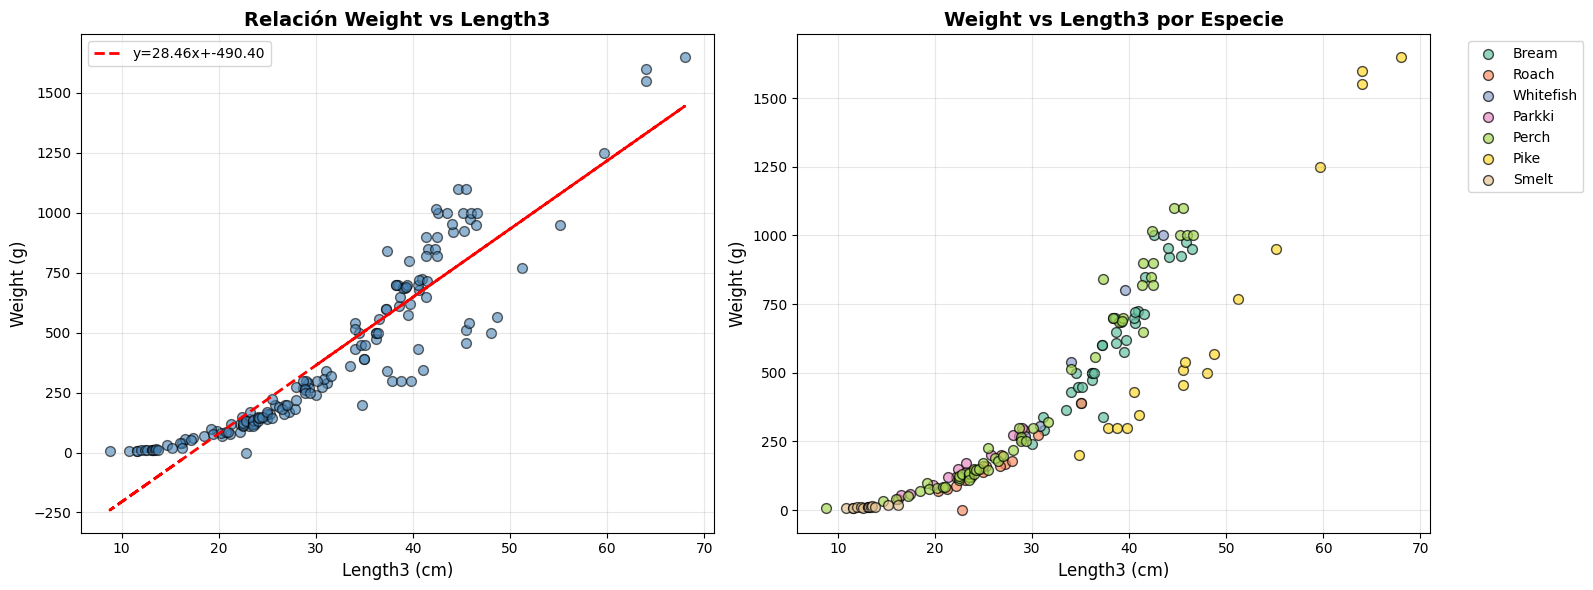

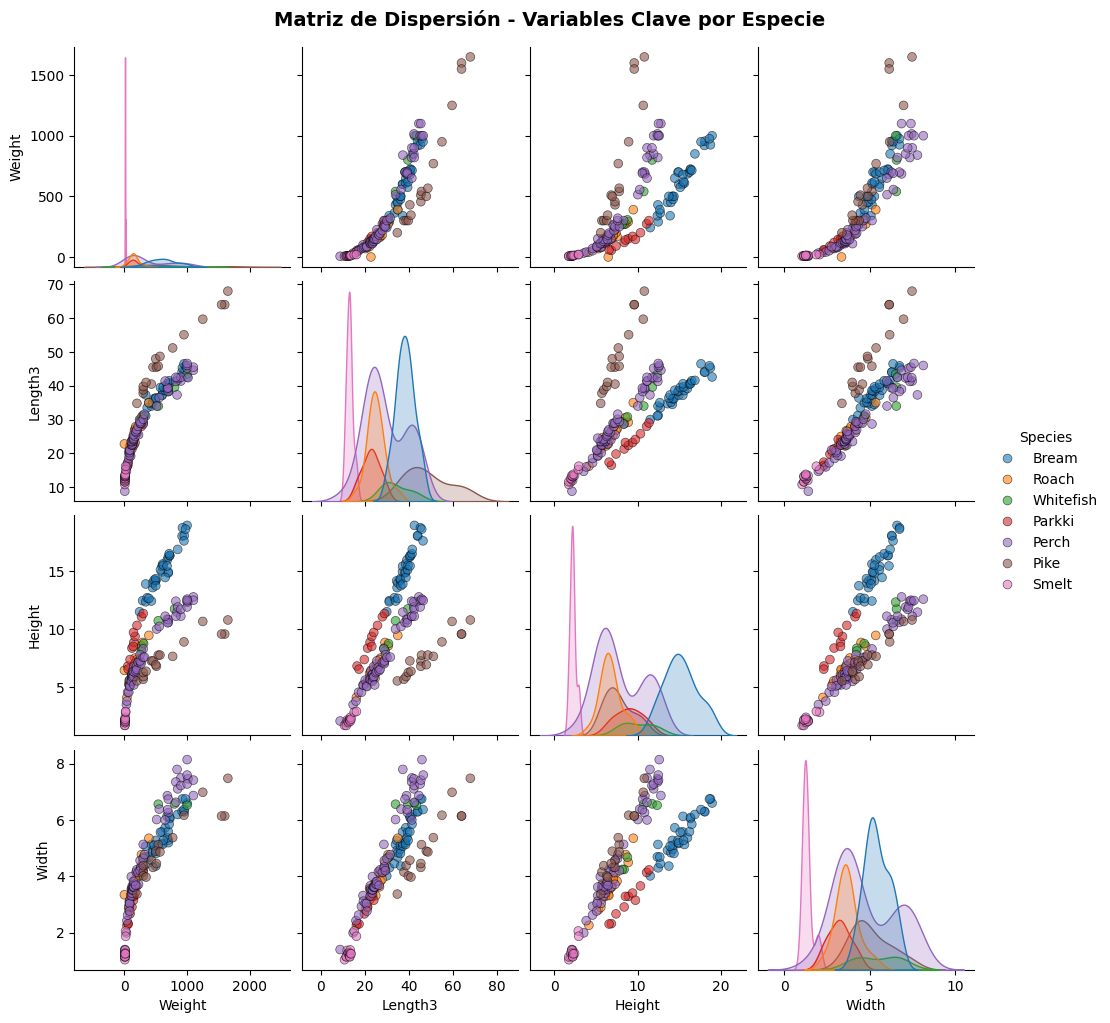

In [80]:
# Scatter plot: Weight vs Length3 (la relación más fuerte)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Relación general
axes[0].scatter(df['Length3'], df['Weight'], alpha=0.6, s=50, color='steelblue', edgecolors='black')
axes[0].set_xlabel('Length3 (cm)', fontsize=12)
axes[0].set_ylabel('Weight (g)', fontsize=12)
axes[0].set_title('Relación Weight vs Length3', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Añadir línea de tendencia
z = np.polyfit(df['Length3'], df['Weight'], 1)
p = np.poly1d(z)
axes[0].plot(df['Length3'], p(df['Length3']), "r--", linewidth=2, label=f'y={z[0]:.2f}x+{z[1]:.2f}')
axes[0].legend()

# Plot 2: Coloreado por especie
especies_unicas = df['Species'].unique()
colores = sns.color_palette('Set2', len(especies_unicas))

for especie, color in zip(especies_unicas, colores):
    data_especie = df[df['Species'] == especie]
    axes[1].scatter(data_especie['Length3'], data_especie['Weight'], 
                   label=especie, alpha=0.7, s=50, color=color, edgecolors='black')

axes[1].set_xlabel('Length3 (cm)', fontsize=12)
axes[1].set_ylabel('Weight (g)', fontsize=12)
axes[1].set_title('Weight vs Length3 por Especie', fontsize=14, fontweight='bold')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


print("="*60)

cols_importantes = ['Weight', 'Length3', 'Height', 'Width']
sns.pairplot(df[cols_importantes + ['Species']], hue='Species', 
             diag_kind='kde', plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},
             height=2.5)
plt.suptitle('Matriz de Dispersión - Variables Clave por Especie', y=1.02, fontsize=14, fontweight='bold')
plt.show()

Observamos una relacion no lineal clara, más bien parece exponencial, todas las especies siguen una trayectoria similar, pero con diferentes rangos de tamaño

### Análisis por especie

ESTADÍSTICAS DE WEIGHT POR ESPECIE
           count    mean     std    min     max
Species                                        
Pike          17  718.71  494.14  200.0  1650.0
Bream         35  617.83  209.21  242.0  1000.0
Whitefish      6  531.00  309.60  270.0  1000.0
Perch         56  382.24  347.62    5.9  1100.0
Parkki        11  154.82   78.76   55.0   300.0
Roach         20  152.05   88.83    0.0   390.0
Smelt         14   11.18    4.13    6.7    19.9


C:\Users\Abraham\AppData\Local\Temp\ipykernel_27044\28455499.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_sorted, x='Species', y='Weight', palette='Set2')


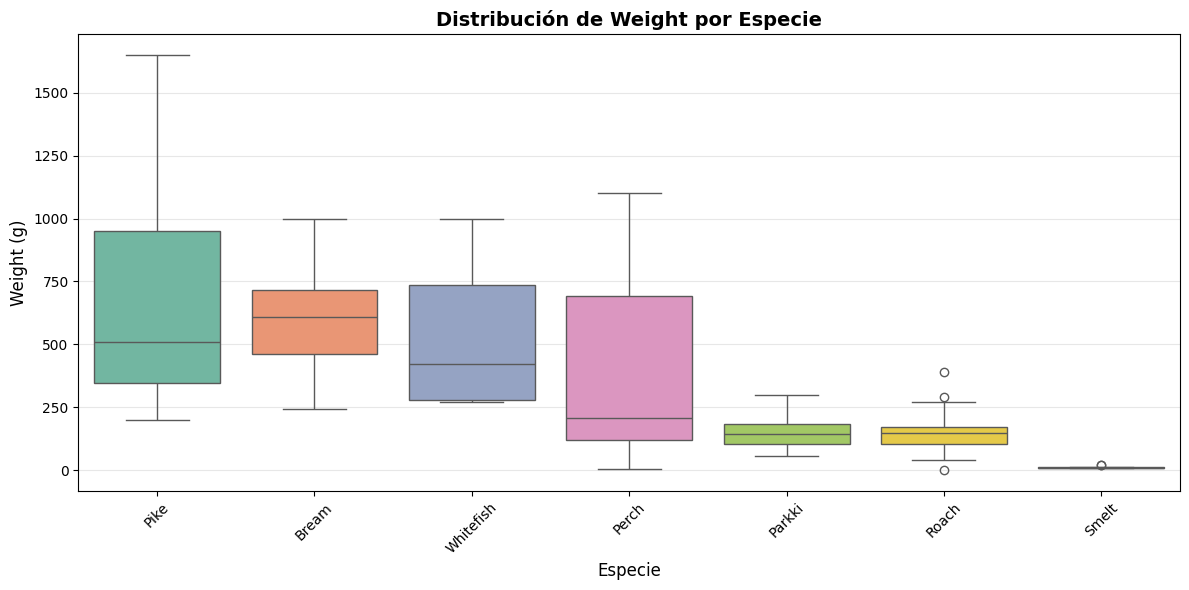


CORRELACIÓN WEIGHT vs LENGTH3 POR ESPECIE
Bream        (n=35): r = 0.947
Roach        (n=20): r = 0.918
Whitefish    (n= 6): r = 0.996
Parkki       (n=11): r = 0.971
Perch        (n=56): r = 0.960
Pike         (n=17): r = 0.979
Smelt        (n=14): r = 0.948


In [81]:
print("="*60)
print("ESTADÍSTICAS DE WEIGHT POR ESPECIE")
print("="*60)
weight_by_species = df.groupby('Species')['Weight'].agg(['count', 'mean', 'std', 'min', 'max'])
weight_by_species = weight_by_species.sort_values('mean', ascending=False)
print(weight_by_species.round(2))

# Boxplot comparativo
plt.figure(figsize=(12, 6))
df_sorted = df.copy()
df_sorted['Species'] = pd.Categorical(df_sorted['Species'], 
                                       categories=weight_by_species.index, 
                                       ordered=True)
sns.boxplot(data=df_sorted, x='Species', y='Weight', palette='Set2')
plt.title('Distribución de Weight por Especie', fontsize=14, fontweight='bold')
plt.xlabel('Especie', fontsize=12)
plt.ylabel('Weight (g)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Correlaciones por especie
print("\n" + "="*60)
print("CORRELACIÓN WEIGHT vs LENGTH3 POR ESPECIE")
print("="*60)
for especie in df['Species'].unique():
    data_especie = df[df['Species'] == especie]
    corr = data_especie['Weight'].corr(data_especie['Length3'])
    n = len(data_especie)
    print(f"{especie:12} (n={n:2}): r = {corr:.3f}")


Las correlaciones son altas en ttodas las especies, esto suguiere que la relacion length/weight sigue el mismo patron biologico independientemente de la especie. Por otro lado podemos ver que las escalas difieren significativamente. Podriamos usar un modelo unico con interceptos diferentes por especie, o aplicar transformaciones logaritmiscas para que todas las especies caigan en la misma escala.

### Tests de normalidad

TESTS DE NORMALIDAD
Variable     Shapiro-Wilk p-value      Normalidad
------------------------------------------------------------
Weight       0.0000                    No normal
Length1      0.0018                    No normal
Length2      0.0031                    No normal
Length3      0.0030                    No normal
Height       0.0002                    No normal
Width        0.0154                    No normal


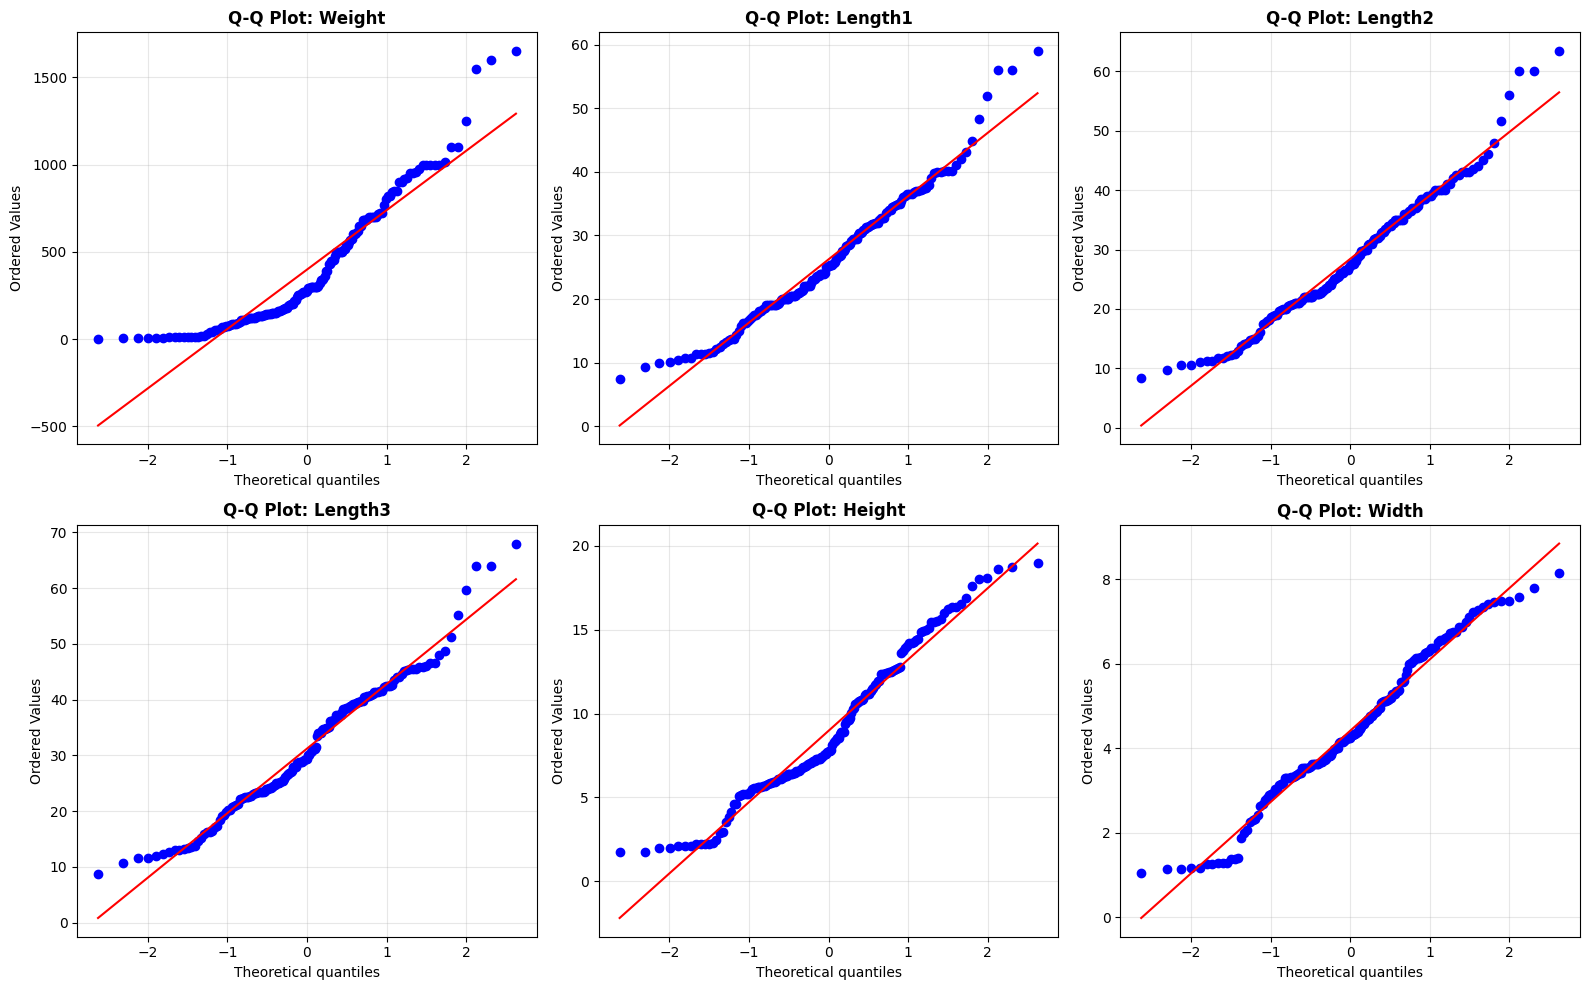

In [85]:
from scipy.stats import shapiro, normaltest

print("="*60)
print("TESTS DE NORMALIDAD")
print("="*60)
print(f"{'Variable':<12} {'Shapiro-Wilk p-value':<25} {'Normalidad'}")
print("-" * 60)

for col in numeric_cols:
    stat, p_value = shapiro(df[col])
    normalidad = "Normal" if p_value > 0.05 else "No normal"
    print(f"{col:<12} {p_value:<25.4f} {normalidad}")

# Q-Q plots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    stats.probplot(df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot: {col}', fontsize=12, fontweight='bold')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()


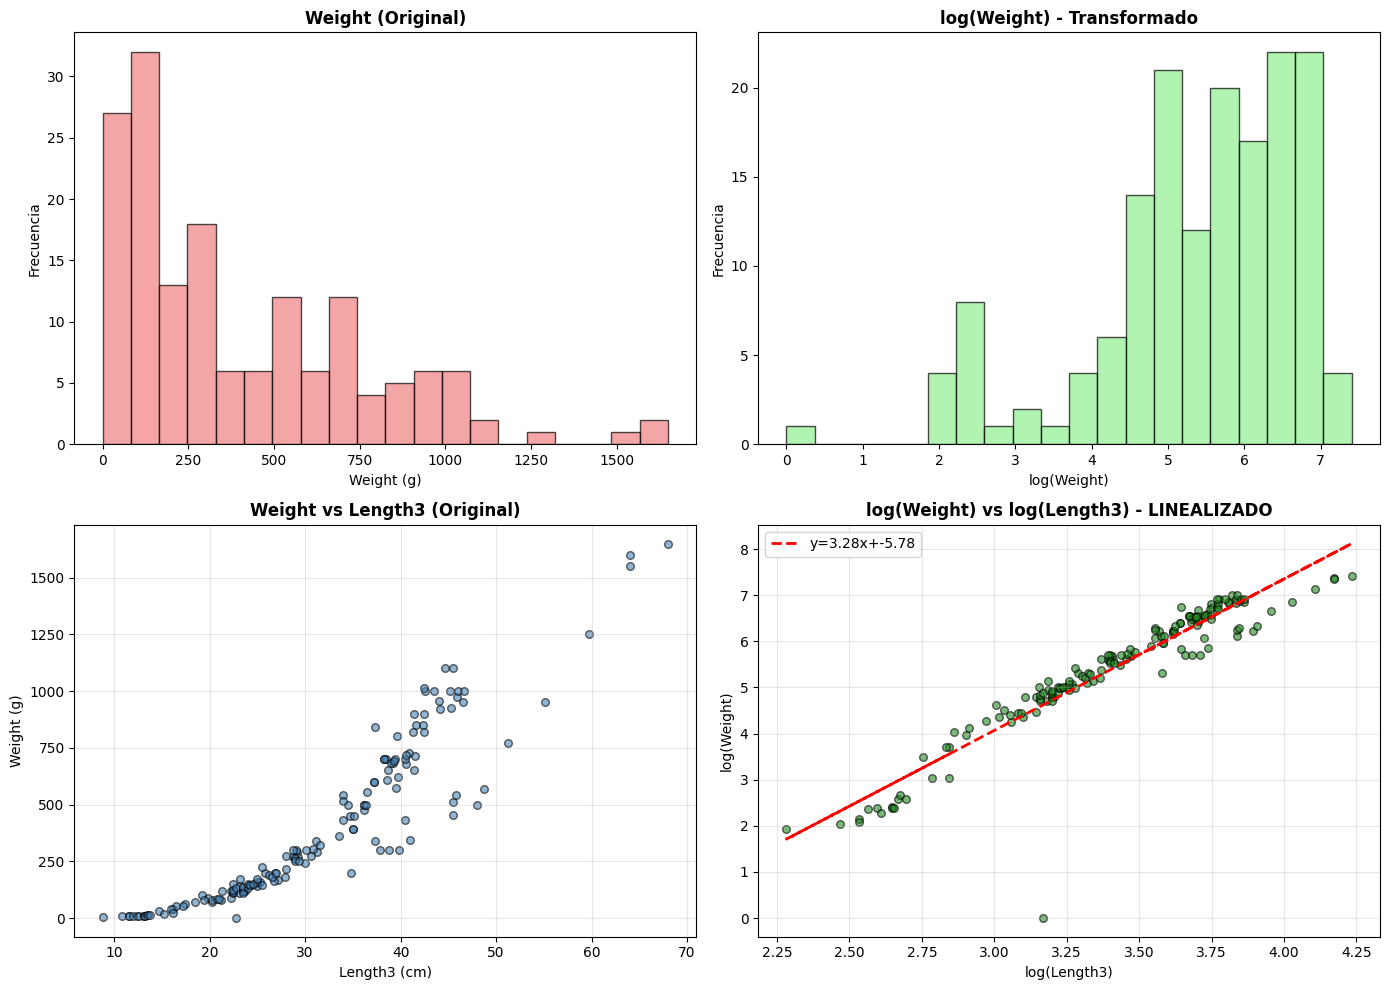

COMPARACIÓN: ORIGINAL vs TRANSFORMADO

1. SKEWNESS (Asimetría)
   Weight original:      1.104
   log(Weight):          -1.162

2. CORRELACIÓN CON LENGTH3
   Original:             0.923
   Log-transformado:     0.937
   Mejora:               1.5%

3. TEST DE NORMALIDAD (Shapiro-Wilk)
   Weight original:      p=0.0000 ✗
   log(Weight):          p=0.0000 ✗


In [86]:
# Crear transformaciones
df_transformed = df.copy()

# Transformación logarítmica (añadir 1 para evitar log(0))
df_transformed['log_Weight'] = np.log(df['Weight'] + 1)
df_transformed['log_Length3'] = np.log(df['Length3'] + 1)
df_transformed['log_Height'] = np.log(df['Height'] + 1)
df_transformed['log_Width'] = np.log(df['Width'] + 1)

# Comparar distribuciones antes y después
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Weight original
axes[0, 0].hist(df['Weight'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Weight (Original)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Weight (g)')
axes[0, 0].set_ylabel('Frecuencia')

# Weight transformado
axes[0, 1].hist(df_transformed['log_Weight'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_title('log(Weight) - Transformado', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('log(Weight)')
axes[0, 1].set_ylabel('Frecuencia')

# Scatter original
axes[1, 0].scatter(df['Length3'], df['Weight'], alpha=0.6, s=30, color='steelblue', edgecolors='black')
axes[1, 0].set_title('Weight vs Length3 (Original)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Length3 (cm)')
axes[1, 0].set_ylabel('Weight (g)')
axes[1, 0].grid(alpha=0.3)

# Scatter transformado
axes[1, 1].scatter(df_transformed['log_Length3'], df_transformed['log_Weight'], 
                  alpha=0.6, s=30, color='forestgreen', edgecolors='black')
axes[1, 1].set_title('log(Weight) vs log(Length3) - LINEALIZADO', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('log(Length3)')
axes[1, 1].set_ylabel('log(Weight)')
axes[1, 1].grid(alpha=0.3)

# Añadir línea de tendencia al gráfico transformado
z = np.polyfit(df_transformed['log_Length3'], df_transformed['log_Weight'], 1)
p = np.poly1d(z)
axes[1, 1].plot(df_transformed['log_Length3'], p(df_transformed['log_Length3']), 
               "r--", linewidth=2, label=f'y={z[0]:.2f}x+{z[1]:.2f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Comparar métricas
print("="*60)
print("COMPARACIÓN: ORIGINAL vs TRANSFORMADO")
print("="*60)

print("\n1. SKEWNESS (Asimetría)")
print(f"   Weight original:      {df['Weight'].skew():.3f}")
print(f"   log(Weight):          {df_transformed['log_Weight'].skew():.3f}")

print("\n2. CORRELACIÓN CON LENGTH3")
corr_original = df['Weight'].corr(df['Length3'])
corr_transformed = df_transformed['log_Weight'].corr(df_transformed['log_Length3'])
print(f"   Original:             {corr_original:.3f}")
print(f"   Log-transformado:     {corr_transformed:.3f}")
print(f"   Mejora:               {((corr_transformed - corr_original) / corr_original * 100):.1f}%")

print("\n3. TEST DE NORMALIDAD (Shapiro-Wilk)")
_, p_original = shapiro(df['Weight'])
_, p_transformed = shapiro(df_transformed['log_Weight'])
print(f"   Weight original:      p={p_original:.4f} {'✗' if p_original < 0.05 else '✓'}")
print(f"   log(Weight):          p={p_transformed:.4f} {'✗' if p_transformed < 0.05 else '✓'}")
